# Clustring Normal data

This project is made by **Mashu Ajmera** and **Mayank Aggarwal**.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Loading Dataset
We have used the [Online Retail Data Set from UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/online+retail), which consists of all variuos purchases done on a United Kingdom-based online retail store.

|                          |        |
|--------------------------|:------:|
| DataSet Type  | Normal |
| Associated Task  | Clustering |



In [ ]:
#  We will load the dataset using Pandas read_csv() function
df = pd.read_csv('OnlineRetail.csv',engine='python')

print('Number of instances: ', df.shape[0])
print('Number of attributes: ', df.shape[1])

# We will display its random 5 data points
df.head()

Number of instances:  541909
Number of attributes:  8


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

## Data Type
InvoiceNo--> Nominal<br>
StockCoded--> Nominal<br>
Description--> text<br>
Quantity--> continous<br>
InvoiceDate--> Continous<br>
unitPrice--> Continous<br>
CustomerID--> Nominal<br>
Country--> Nominal

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Since Invoice Date, CustomerId and Country should be date-time, nominal and categorical attributes, we change their data types.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df['Quantity'] = df['Quantity'].fillna(0).astype('int')
df['Country'] = df['Country'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 29.5+ MB


## Summary Statistics
We will utilize the **describe()** function to show the summary for all the features together in a table. For a quantitative attribute, mean, median, standard deviation, maximum, minimum and various other values are displayed while for qualitative attributes, the number of most frequent(top) and unique values are displayed.

In [ ]:
df.describe(include='all')

InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
first        NaN       NaN                                 NaN            NaN   
last         NaN       NaN                                 NaN            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

                InvoiceDate      UnitPrice     CustomerID         Country  
count                541909  541909.000000  406829.000000          541909  
unique                23260            NaN            NaN              38  
top     2011-10-31 14:41:00            NaN            NaN  United Kingdom  
freq                   1114            NaN            NaN          495478  
first   2010-12-01 08:26:00            NaN            NaN             NaN  
last    2011-12-09 12:50:00            NaN            NaN             NaN  
mean                    NaN       4.611114   15287.690570             NaN  
std                     NaN      96.759853    1713.600303             NaN  
min                     NaN  -11062.060000   12346.000000             NaN  
25%                     NaN       1.250000   13953.000000             NaN  
50%                     NaN       2.080000   15152.000000             NaN  
75%                     NaN       4.130000   16791.000000             NaN  
max                     NaN   38970.000000   18287.000000             NaN

# Data Quality Issues
## Missing Values
We will calculate the number of missing values for each attribute of the dataset.

In [ ]:
print('Number of missing values:')
df.isnull().sum()

Number of missing values:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.dropna(inplace=True)
print('Number of instances after deleting missing values: ', df.shape[0])

Number of instances after deleting missing values:  406829


We observe that the 'Description' and 'Country' columns contain missing values. Since, they are attributes with nominal values, we will simply remove the records that contain those missing or null values. We will do this with the help of the **dropna()** function in pandas. The shape of the dataset after dropping is also printed.

## Outliers
Now, we will try to  identify the attributes in the dataset that consists of outliers.



Text(0.5, 0, 'Columns')

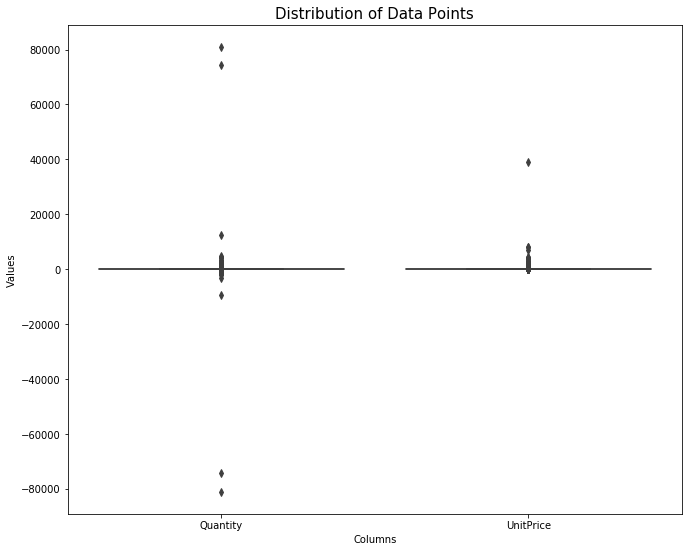

In [ ]:
attributes = ['Quantity','UnitPrice']
plt.rcParams['figure.figsize'] = [11,9]
sns.boxplot(data = df[attributes], orient="v")
plt.title("Distribution of Data Points", fontsize = 15)
plt.ylabel("Values")
plt.xlabel("Columns")

The boxplots suggest that both Amount and UnitPrice contain abnormally high values. So, we will be removing (statistical) outliers for these attributes.

In [ ]:
# Amount
first = df.Quantity.quantile(0.25)
last = df.Quantity.quantile(0.75)
diff = last - first
df = df[(df.Quantity >= first - 1.5*diff) & (df.Quantity <= last + 1.5*diff)]

# UnitPrice
first = df.UnitPrice.quantile(0.25)
last = df.UnitPrice.quantile(0.75)
diff = last - first
df = df[(df.UnitPrice >= first - 1.5*diff) & (df.UnitPrice <= last + 1.5*diff)]

print('Number of rows after removing outliers: ', df.shape[0])

Number of rows after removing outliers:  344393


Text(0.5, 0, 'Columns')

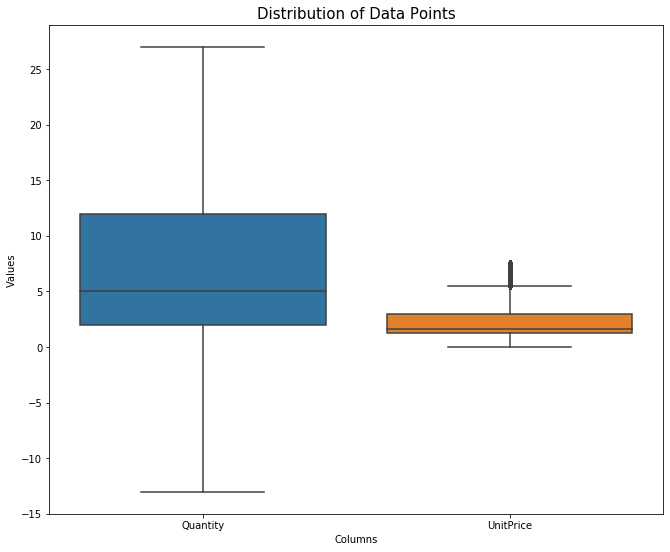

In [ ]:
attributes = ['Quantity','UnitPrice']
plt.rcParams['figure.figsize'] = [11,9]
sns.boxplot(data = df[attributes], orient="v")
plt.title("Distribution of Data Points", fontsize = 15)
plt.ylabel("Values")
plt.xlabel("Columns")

## Duplicate Data
Now, we will check the count of duplicate records in the dataset.

In [ ]:
print('Number of duplicate instances: ', df.duplicated().sum())

Number of duplicate instances:  4940


There are **4940 duplicate records** in our online retail data frame. Even though these purchases may be done by different individuals, here, in our case, we will assume that these are purchases made by same people and so we will remove the duplicate ones.

In [ ]:
df.drop_duplicates(keep='first', inplace=True)
print('Number of rows after releting duplicates: ', df.shape[0])

Number of rows after releting duplicates:  339453


We will now compute the correlation between pairs of attributes and plot them in a heat map for visualization.

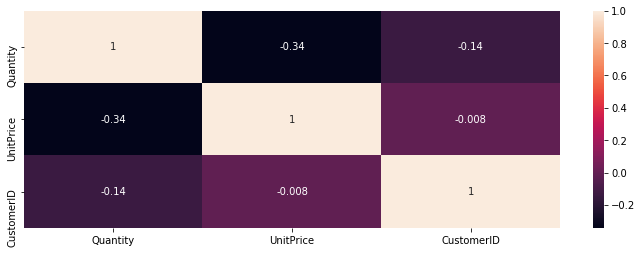

In [ ]:
corr=df.corr()
plt.figure(figsize=(12,4))
sns.heatmap(corr,annot=True)
plt.show()

None of the attribute is higly correlated no need of dimension deduction by droping any attribute

# Dimension Reduction
We will perform dimension reduction via **Feature Creation** and **Feature Subset Selection**.

## Total Amount

In [ ]:
df['Total']= df['Quantity'] * df['UnitPrice']
total_amount = df['Total'].groupby(df['CustomerID']).sum()
total_amount = pd.DataFrame(total_amount).reset_index()
total_amount.head()

CustomerID    Total
0     12347.0  3314.73
1     12348.0    90.20
2     12349.0   999.15
3     12350.0   294.40
4     12352.0  1010.61

## Number of Transactions

In [ ]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

CustomerID  Frequency
0     12347.0        166
1     12348.0          6
2     12349.0         58
3     12350.0         16
4     12352.0         73

## Last Transaction

In [ ]:
max_date = max(df['InvoiceDate'])
df['Latest'] = max_date - df['InvoiceDate']
most_recent = df.groupby('CustomerID')['Latest'].min()
most_recent = most_recent.reset_index()
most_recent['Latest'] = most_recent['Latest'].dt.days
most_recent.head()

CustomerID  Latest
0     12347.0       1
1     12348.0     248
2     12349.0      18
3     12350.0     309
4     12352.0      35

## Merging the Features

In [ ]:
df_new = pd.merge(total_amount, frequency, how='inner', on='CustomerID')
df_new = pd.merge(df_new, most_recent, how='inner', on='CustomerID')
df_new.head()

CustomerID    Total  Frequency  Latest
0     12347.0  3314.73        166       1
1     12348.0    90.20          6     248
2     12349.0   999.15         58      18
3     12350.0   294.40         16     309
4     12352.0  1010.61         73      35

Thus, we select the df_new dataset going forward with its set of features.

# Data Transformation
In this section, we will try to make the distribution of continuous numerical data as Normal (Gaussian).
We will first plot the data to visualize the type of distribution.

We will be checking their normality using the **Kurtosis** value and plotting the graph for visualization. Kurtosis can be measures by two types, one is by taking **fisher=true** in which case, normality is when **kurtosis = 0**.  Another type of measuring kurtosis is by taking **fisher=false**, where Pearson definition is used and for normality is achieved for **kurtosis = 3**.

Kurtosis of  CustomerID  distribution is:  1.8053580857608895
Kurtosis of  Total  distribution is:  544.3643135430034
Kurtosis of  Frequency  distribution is:  540.6777463791688
Kurtosis of  Latest  distribution is:  3.4164545355778273


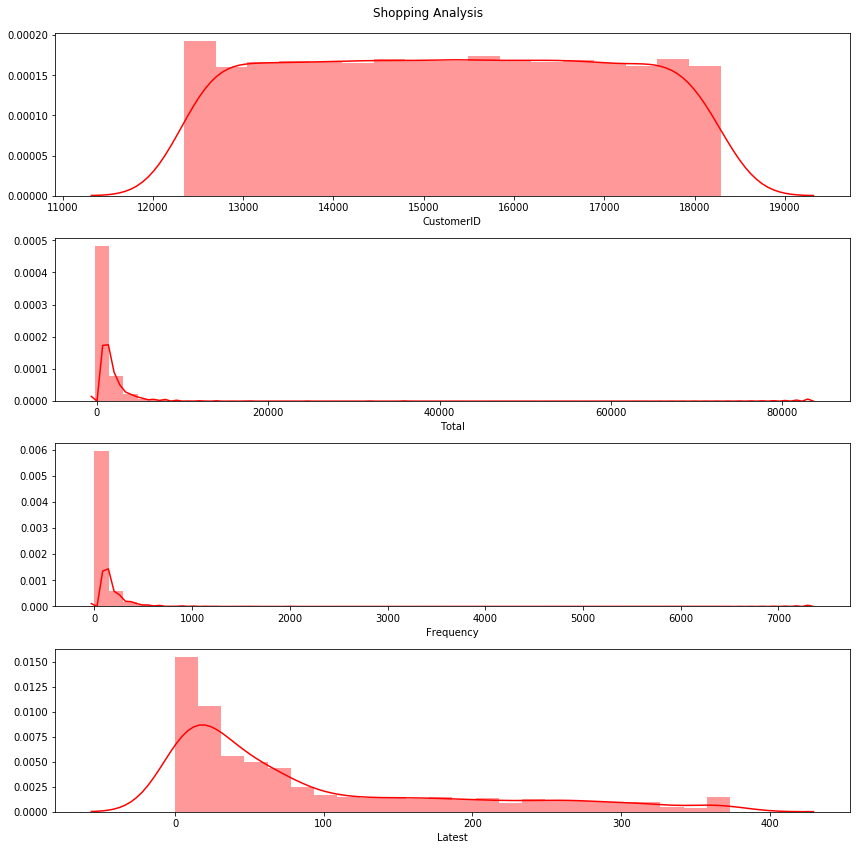

In [ ]:
plt.figure(figsize = (12, 12))
j = 0
for i in df_new.columns:
    plt.subplot(4, 1, j+1)
    sns.distplot(df_new[i],color="red")
    print("Kurtosis of ",i," distribution is: ",st.kurtosis(df_new[i],fisher=False) )
    j += 1
plt.suptitle('Shopping Analysis')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

Depending of the skewness and distribution of the graph we try to apply various transformations including power, exponential, logarithmic, arcsin, etc and the following are the best results we got.

## Customer ID

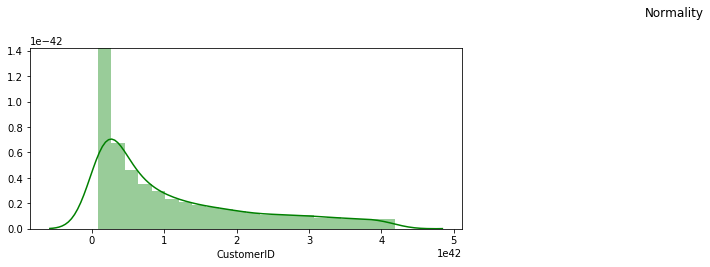

Kurtosis of CustomerID distribution after transformation is:  3.0859704583350287


In [ ]:
plt.figure(figsize = (19, 19))
df1=df_new['CustomerID'].transform(func = lambda x : np.power(x,10))
plt.subplot(6, 3, 1)
sns.distplot(df1,color="green")
plt.suptitle('Normality')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
print("Kurtosis of CustomerID distribution after transformation is: ",st.kurtosis(df1,fisher=False) )

## Total

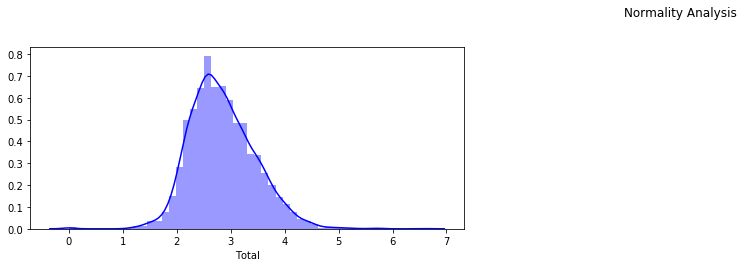

Kurtosis of Total distribution after transformation is:  4.237542627134837


In [ ]:
plt.figure(figsize = (19, 19))
df2=df_new['Total'].transform(func = lambda x : np.power(x,1/6))
plt.subplot(6, 3, 1)
sns.distplot(df2,color="blue")
plt.suptitle('Normality Analysis')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
print("Kurtosis of Total distribution after transformation is: ",st.kurtosis(df2,fisher=False,nan_policy='omit') )

## Frequency

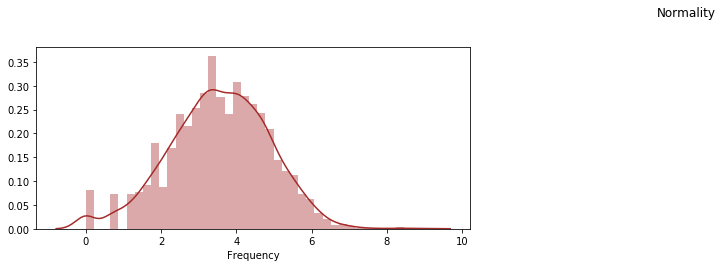

Kurtosis of Frequency distribution after transformation is:  3.084999518168163


In [ ]:
plt.figure(figsize = (19, 19))
df3=df_new['Frequency'].transform(np.log)
plt.subplot(6, 3, 1)
sns.distplot(df3,color="brown")
plt.suptitle('Normality')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
print("Kurtosis of Frequency distribution after transformation is: ",st.kurtosis(df3,fisher=False) )

## Latest

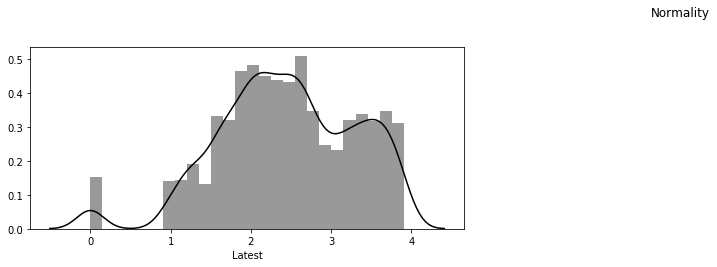

Kurtosis of Latest distribution after transformation is:  3.0069386098000694


In [ ]:
plt.figure(figsize = (19, 19))
df4=df_new['Latest'].transform(func= lambda x: np.power(x,0.23))
plt.subplot(6, 3, 1)
sns.distplot(df4,color="black")
plt.suptitle('Normality')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
print("Kurtosis of Latest distribution after transformation is: ",st.kurtosis(df4,fisher=False) )

All the attribute are near to normal distribution according to excess kurtosis value. 
# Dimension Reduction (Again)
We will now compute the correlation between pairs of attributes and plot them in a heat map for visualization.

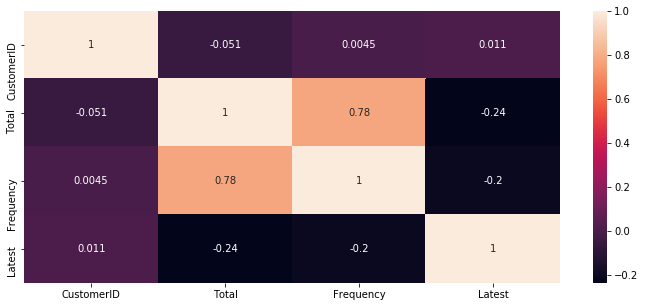

In [ ]:
corr=df_new.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)
plt.show()

Since, there is no high correlation between any two attributes, we will move forward with all the features without removing any attribute.
Also, since we there is no class attribute we can't make a comparision of interestingnes of all the attributes.

# Data Standardization

In [ ]:
SS = StandardScaler()
data = SS.fit_transform(df_new)
X = pd.DataFrame(data)
X.columns=df_new.columns
X.head()

CustomerID     Total  Frequency    Latest
0   -1.712174  1.065363   0.421864 -0.894959
1   -1.711593 -0.423104  -0.366676  1.557637
2   -1.711012 -0.003526  -0.110400 -0.726157
3   -1.710431 -0.328843  -0.317392  2.163338
4   -1.709268  0.001764  -0.036475 -0.557355

In [ ]:
X.describe(include="all")

CustomerID         Total     Frequency        Latest
count  4.222000e+03  4.222000e+03  4.222000e+03  4.222000e+03
mean   6.978996e-16  1.603982e-17 -3.095056e-17 -2.845242e-17
std    1.000118e+00  1.000118e+00  1.000118e+00  1.000118e+00
min   -1.712174e+00 -5.758218e-01 -3.913178e-01 -9.048884e-01
25%   -8.623126e-01 -3.723073e-01 -3.223206e-01 -7.460158e-01
50%   -2.570254e-03 -2.533430e-01 -2.188247e-01 -4.183411e-01
75%    8.599328e-01  4.667053e-02  3.745074e-02  5.150353e-01
max    1.740162e+00  3.795032e+01  3.571395e+01  2.798829e+00

We can now see that mean is zero and standard deviation is 1 approximately for all the attributes.



# Supervised Discretisation
Since there is no class attribute, supervised discretization is not possible.


**We are going to segment customers into clusters on the basis of**


*   **Total amount spend(Total)**
*   **Frequency**
*   **Latest (how recent customer has make a purchase)**



# Clustering
## K-means Clustering
The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. In this section, we intend to perform k-means clustering on our dataset.

To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 12 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

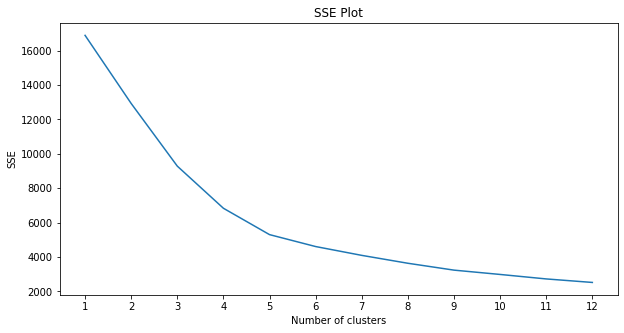

In [ ]:
# Creating a copy of our preprocessed dataset
X_copy=X.copy()

# Taking number of clusters for measuring SSE
numClusters = [1,2,3,4,5,6,7,8,9,10,11,12]

# We will store the SSE for each number of clusters in this array
SSE = []

# Computing SSE for each number(k) of clusters
for k in numClusters:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(X_copy)
    SSE.append(kmeans.inertia_)

# Plotting the SSE curve
plt.subplots(figsize=(10, 5))
plt.plot(numClusters, SSE)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(numClusters)
plt.title('SSE Plot')
plt.show()

On the basis of the above elbow curve, we see some soft descend at k=5. So, we would be creating 5 clusters for our k-means clustering.

In [ ]:
# Creating a copy of our preprocessed dataset
X_km=X.copy()

# Creating a K-Means model with number of clusters=5
k_means = KMeans(n_clusters=5, max_iter=50, random_state=1)

# Fitting our dataset in the model
k_means.fit(X_km)
X_km['ClusterID'] = k_means.labels_

# Seeing the top five records of our preprocessed dataset
X_km.head()

CustomerID     Total  Frequency    Latest  ClusterID
0   -1.712174  1.065363   0.421864 -0.894959          2
1   -1.711593 -0.423104  -0.366676  1.557637          0
2   -1.711012 -0.003526  -0.110400 -0.726157          2
3   -1.710431 -0.328843  -0.317392  2.163338          0
4   -1.709268  0.001764  -0.036475 -0.557355          2

### Analysing the cluster
We will be mapping the cluster ID to the preprocessed data before normalization.

In [ ]:
df_new.index = pd.RangeIndex(len(df_new.index))
X_km = pd.concat([df_new, pd.Series(k_means.labels_)], axis=1)
X_km.columns = ['CustomerID', 'Total', 'Frequency', 'Latest', 'ClusterID']

km_clusters_total = pd.DataFrame(X_km.groupby(["ClusterID"]).Total.mean())
km_clusters_frequency = pd.DataFrame(X_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_latest = pd.DataFrame(X_km.groupby(["ClusterID"]).Total.mean())

df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_total, km_clusters_frequency, km_clusters_latest], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ClusterID       5 non-null      int64  
 1   Amount_mean     5 non-null      float64
 2   Frequency_mean  5 non-null      float64
 3   Recency_mean    5 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 288.0 bytes


### Amount_mean vs Cluster ID

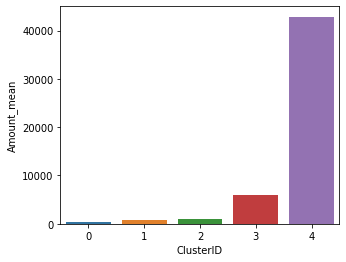

In [ ]:
plt.subplots(figsize=(5, 4))
sns.barplot(x=df.ClusterID, y=df.Amount_mean)
plt.show()

Customers with Cluster Id 4 are the customers with high amount of transactions as compared to other customers.
### Frequency_mean vs Cluster ID

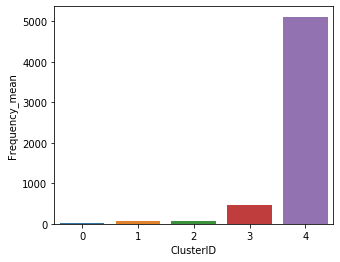

In [ ]:
plt.subplots(figsize=(5, 4))
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)
plt.show()

Customers with Cluster Id 4 are frequent buyers.
### Recency_mean vs Cluster ID

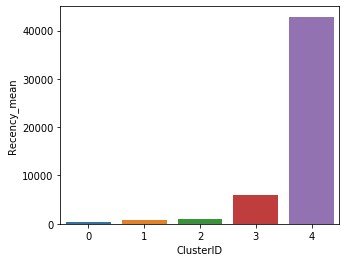

In [ ]:
plt.subplots(figsize=(5, 4))
sns.barplot(x=df.ClusterID, y=df.Recency_mean)
plt.show()

Customers with Cluster Id 4 are not recent buyers and hence least of importance from business point of view.
### Visualizing our model
Since it is not easy to visualize the clusters for higher dimensions, we will use PCA to reduce the number of dimensions and then visualize the clusters.

In [ ]:
pX = pd.DataFrame(np.array(X_km.sample(5000,replace=True)))
pX.columns = X_km.columns
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)
PCs_2d = pd.DataFrame(pca_2d.fit_transform(pX.drop(["ClusterID"], axis=1)))
PCs_3d = pd.DataFrame(pca_3d.fit_transform(pX.drop(["ClusterID"], axis=1)))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]
pX = pd.concat([pX,PCs_2d,PCs_3d], axis=1, join='inner')

pX.head()

CustomerID   Total  Frequency  Latest  ClusterID       PC1_2d       PC2_2d  \
0     16930.0  292.17       50.0    25.0        1.0  -820.734889  1574.203149   
1     14965.0  461.64       78.0    95.0        2.0  -561.718329  -380.972016   
2     16162.0   11.90        1.0   251.0        0.0 -1070.498010   794.119050   
3     15605.0  944.53       53.0    35.0        1.0  -110.575685   279.817229   
4     13147.0  237.60        2.0    42.0        2.0  -707.593609 -2207.686626   

        PC1_3d       PC2_3d     PC3_3d  
0  -820.734889  1574.203149  22.917074  
1  -561.718329  -380.972016  35.851954  
2 -1070.498010   794.119050 -38.078669  
3  -110.575685   279.817229 -15.083895  
4  -707.593609 -2207.686626  -8.377327

In [ ]:
cluster0 = pX[pX["ClusterID"] == 0]
cluster1 = pX[pX["ClusterID"] == 1]
cluster2 = pX[pX["ClusterID"] == 2]
cluster3 = pX[pX["ClusterID"] == 3]
cluster4 = pX[pX["ClusterID"] == 4]
init_notebook_mode(connected=True)

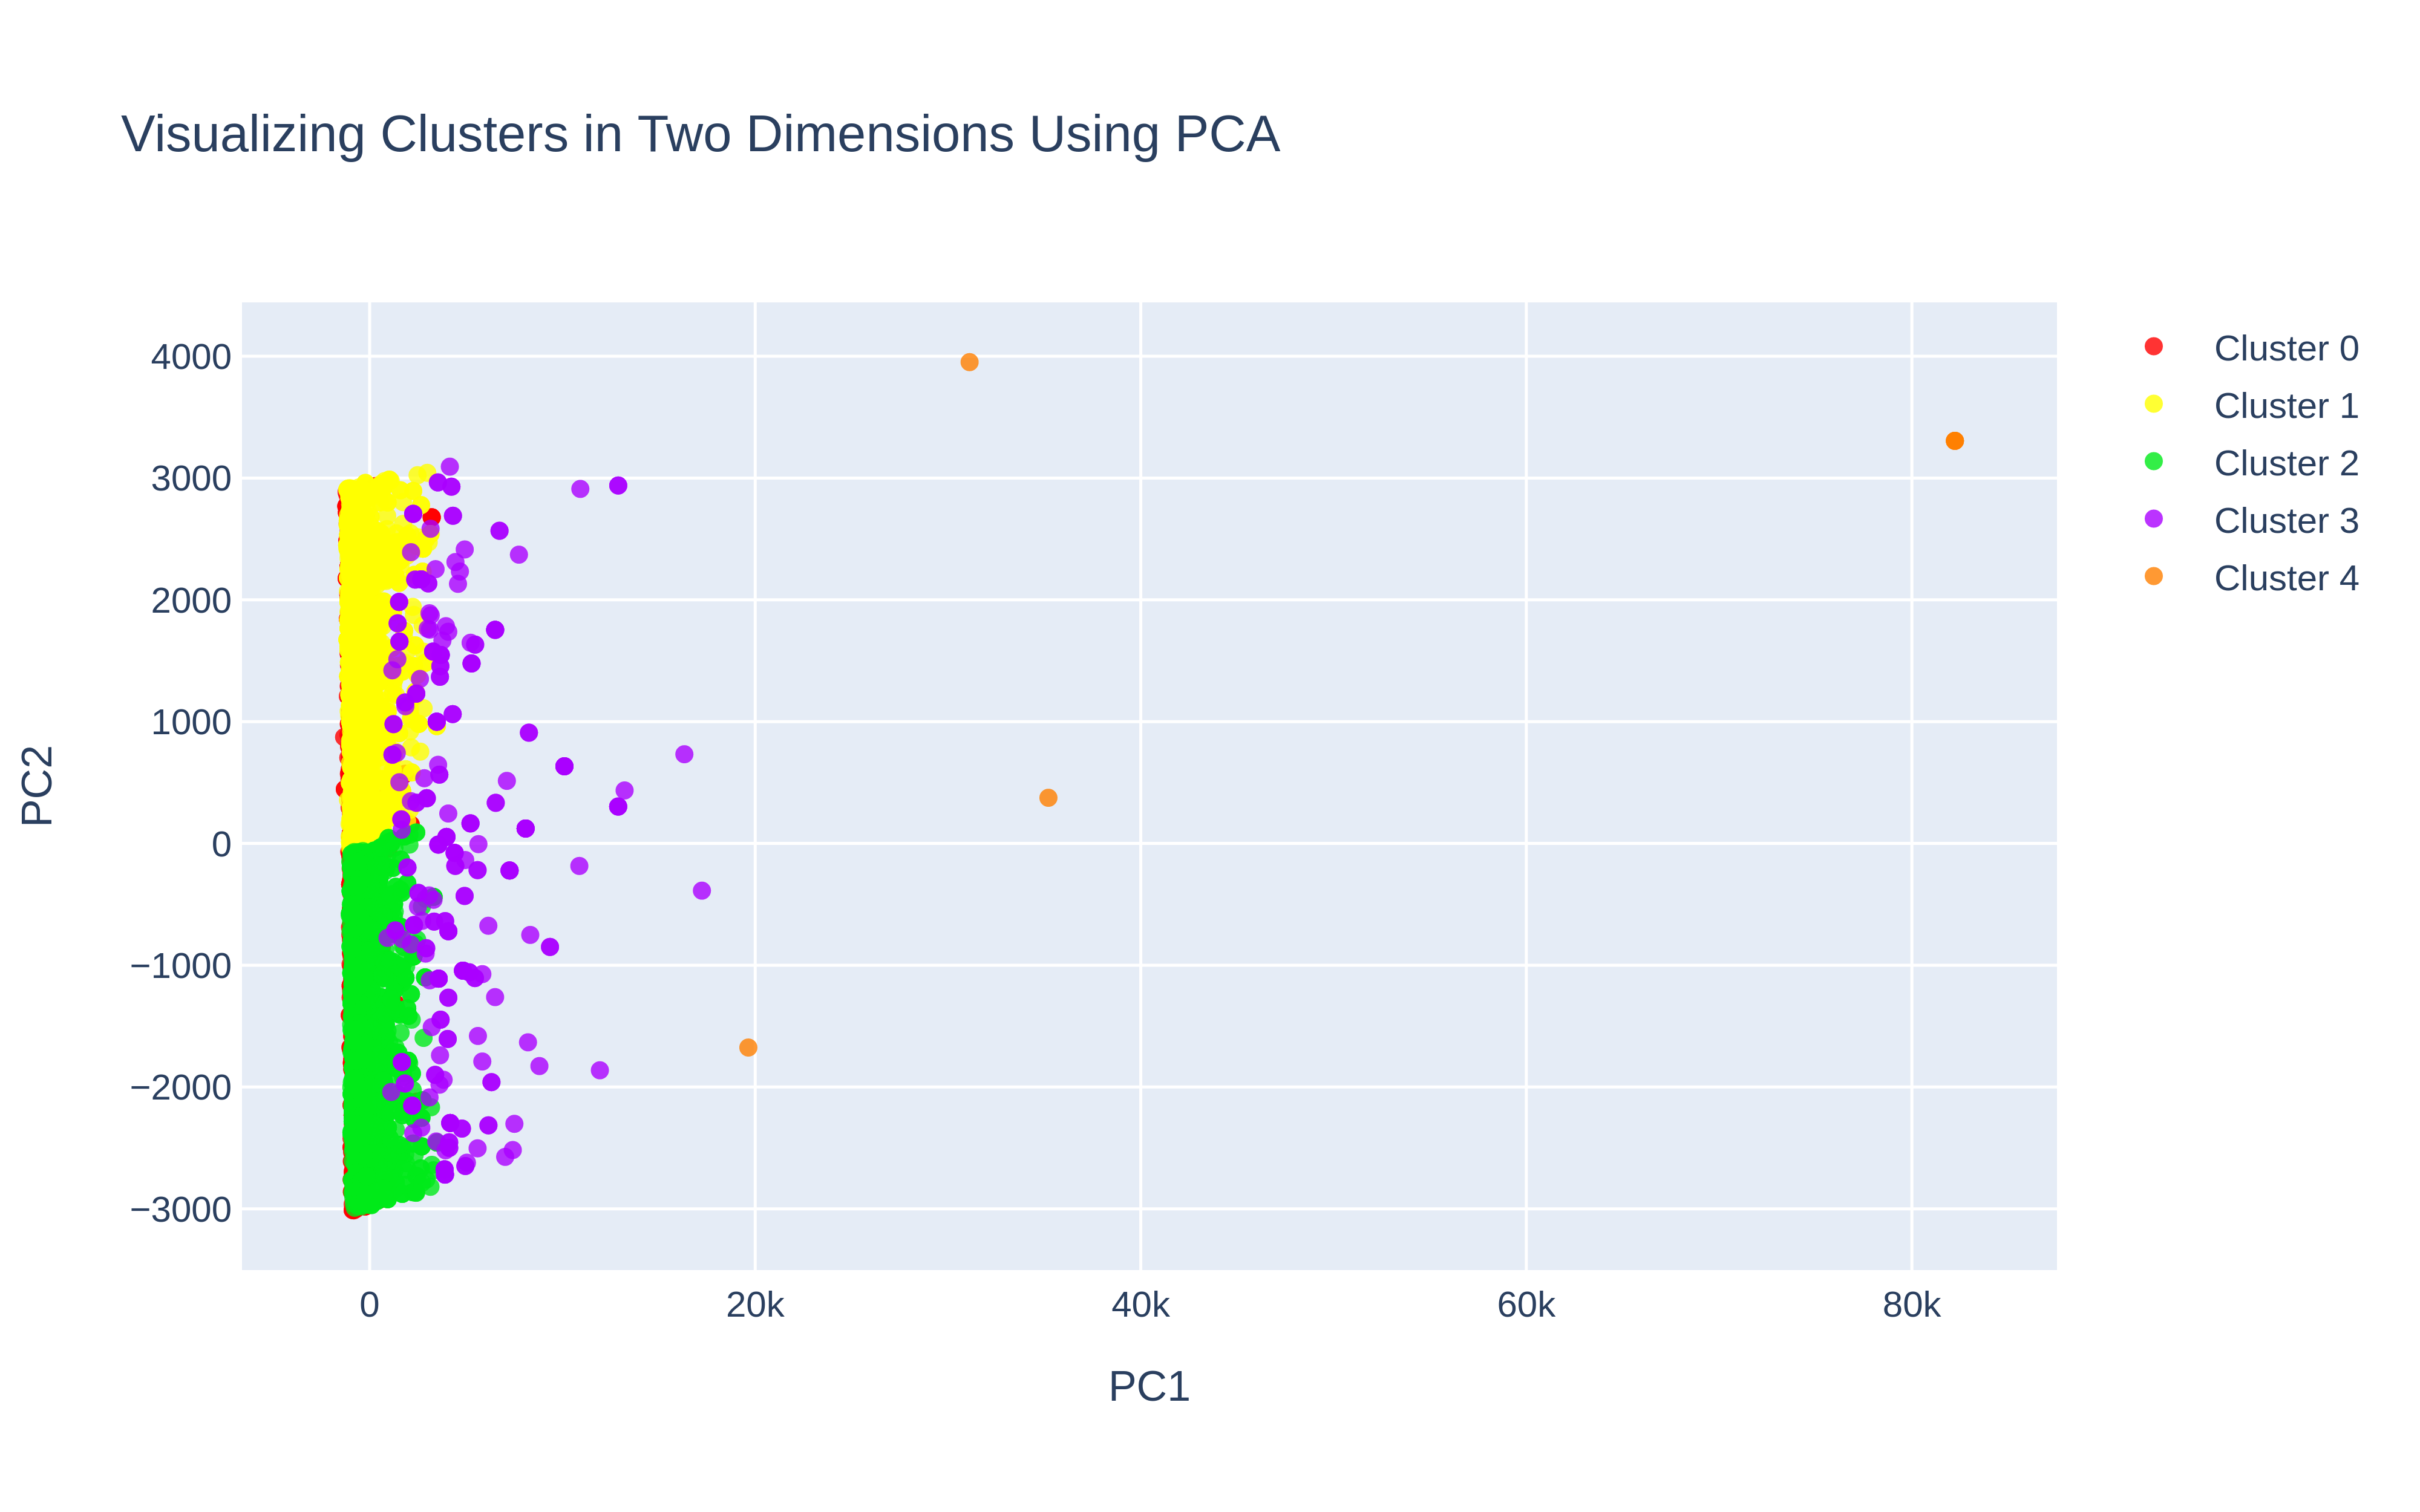

In [ ]:
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
                    text = None)
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 255, 0, 0.8)'),
                    text = None)
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 234, 25, 0.8)'),
                    text = None)
trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(170, 0, 255, 0.8)'),
                    text = None)
trace5 = go.Scatter(
                    x = cluster4["PC1_2d"],
                    y = cluster4["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(255, 127, 0, 0.8)'),
                    text = None)
data = [trace1, trace2, trace3,trace4,trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = go.Layout(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = go.Figure(data = data, layout = layout)

# iplot(fig)
imgbytes = fig.to_image(format='png', width=800, height=500, scale=5)
from IPython.display import Image
Image(imgbytes)

Now, we will visualize the clusters in 3D to get a better idea (than in 2D representation) about the clusters distribution.

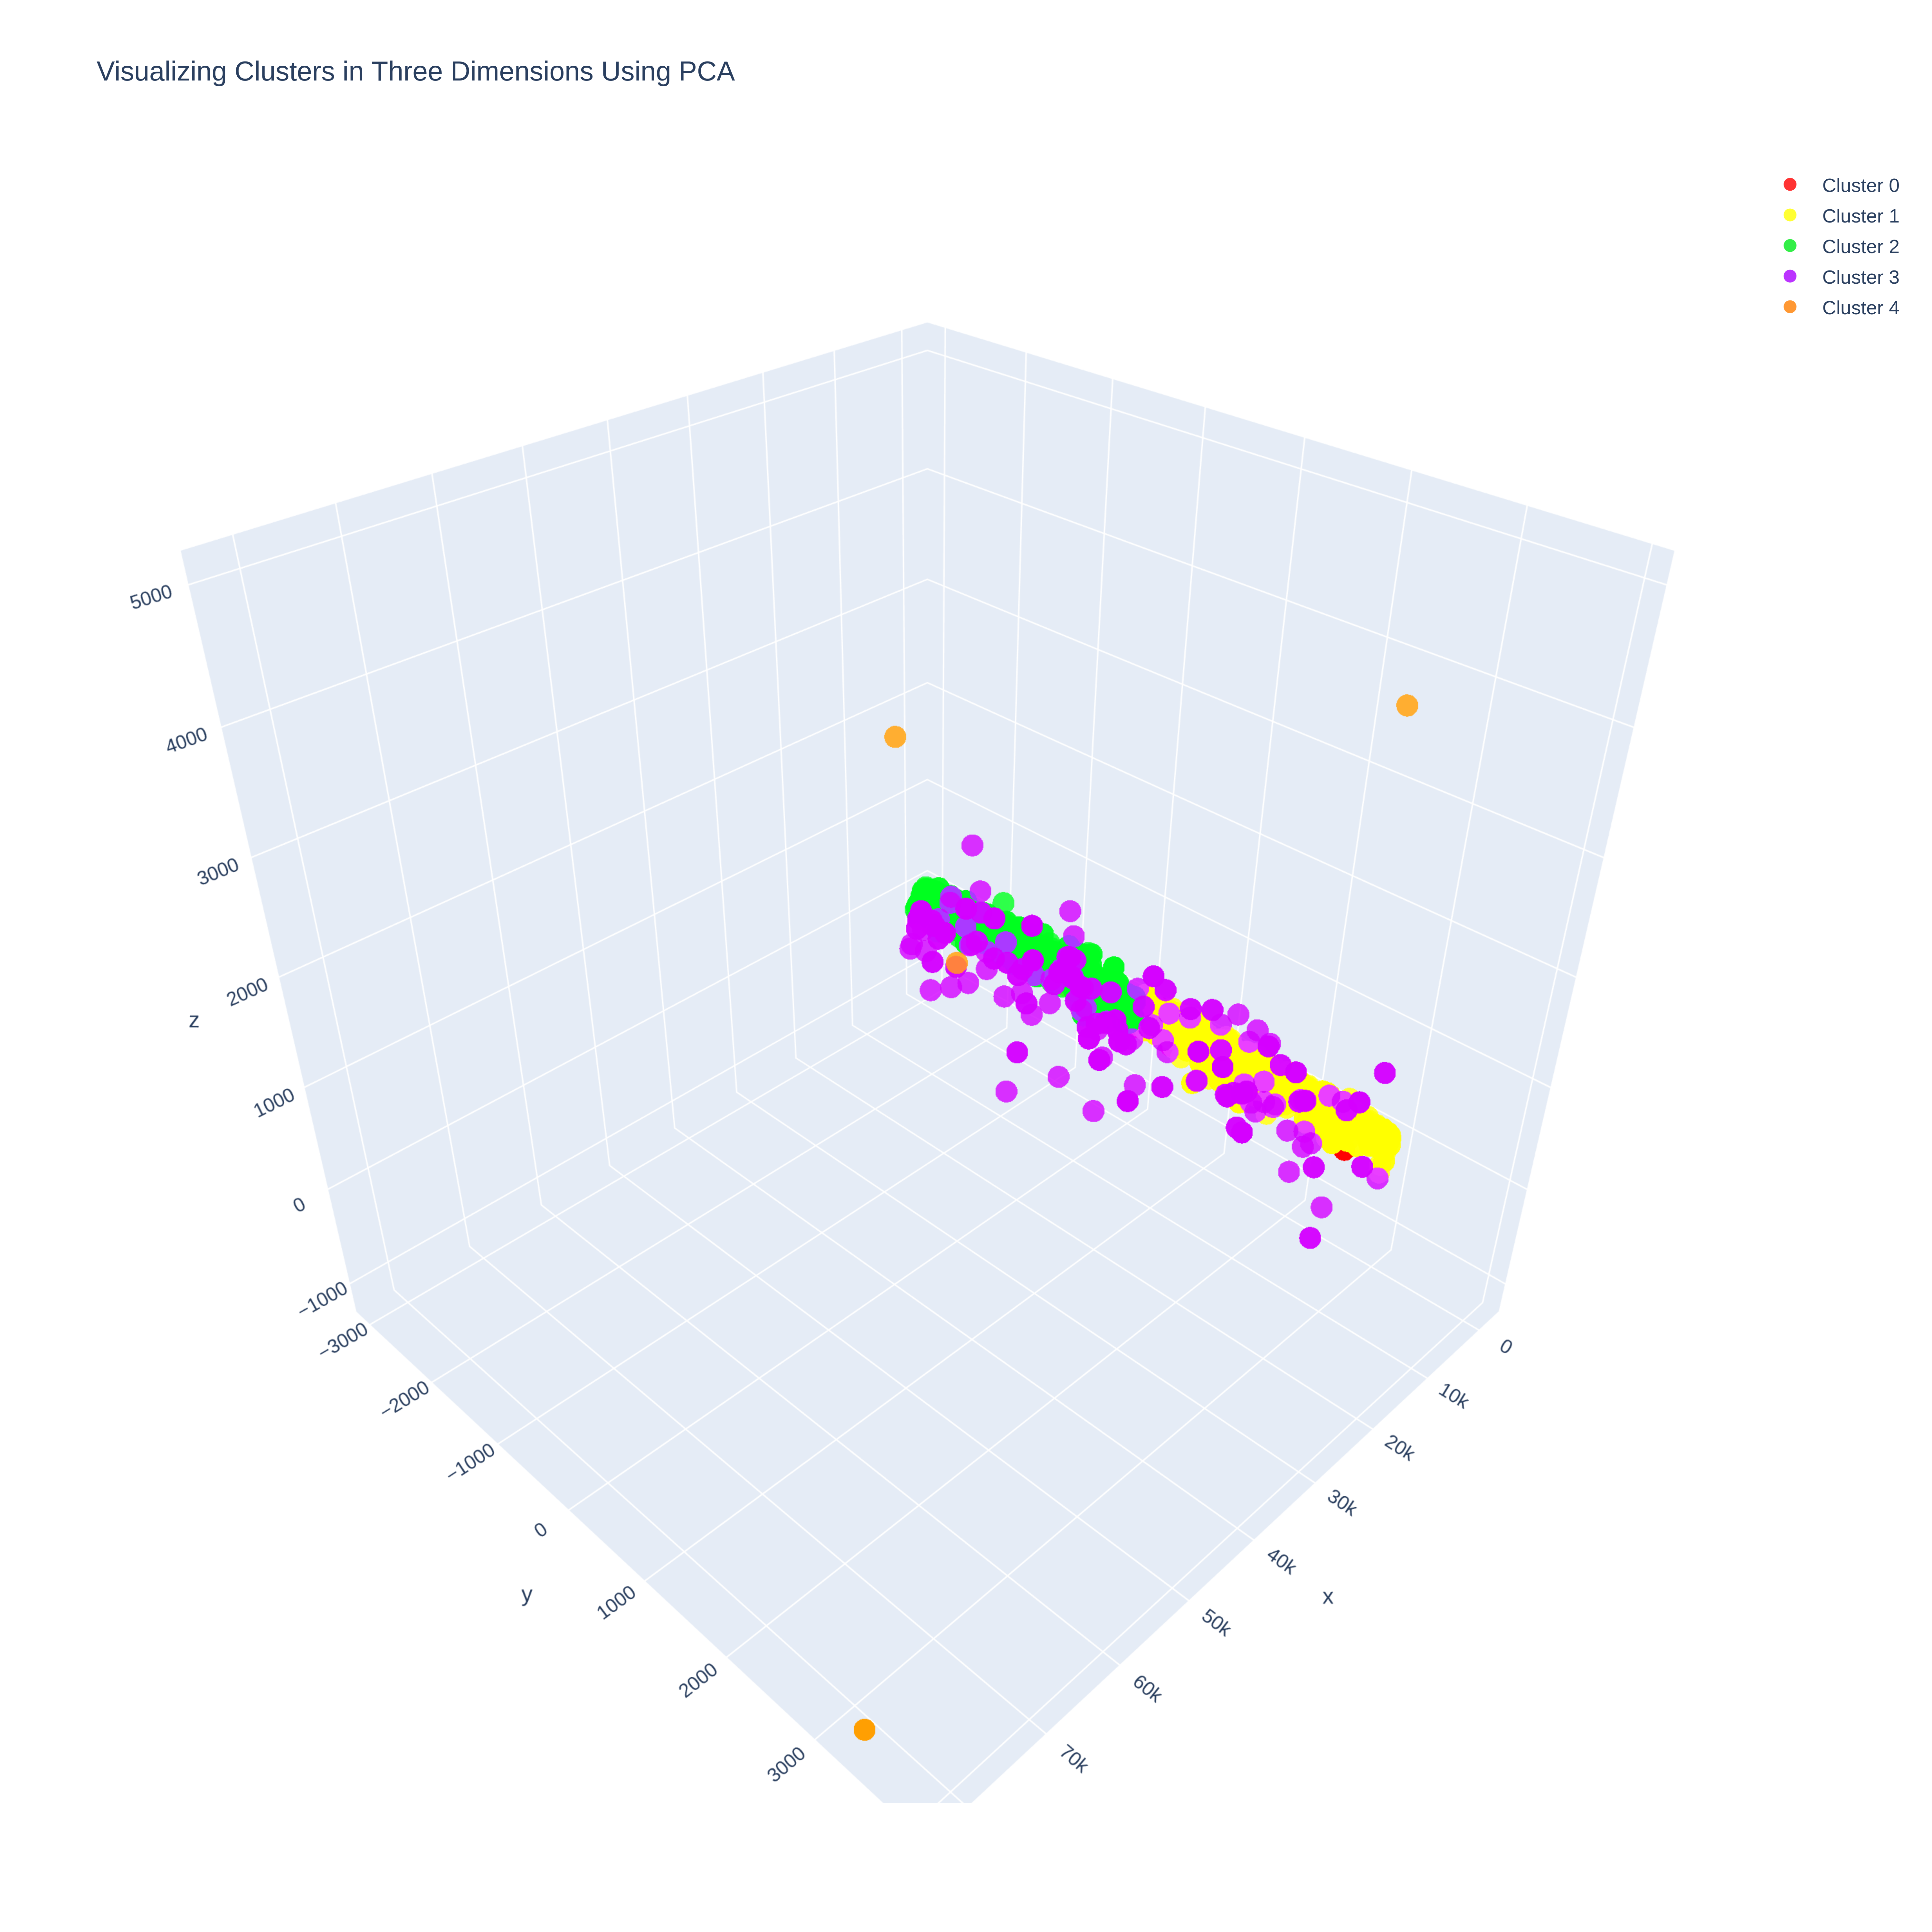

In [ ]:
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 255, 0, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 234, 25, 0.8)'),
                    text = None)
trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(170, 0, 255, 0.8)'),
                    text = None)
trace5 = go.Scatter3d(
                    x = cluster4["PC1_3d"],
                    y = cluster4["PC2_3d"],
                    z = cluster4["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(255, 127, 0, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3,trace4,trace5]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = go.Layout(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = go.Figure(data = data, layout = layout)

# iplot(fig)
imgbytes = fig.to_image(format='png', width=1200, height=1200, scale=5)
from IPython.display import Image
Image(imgbytes)

## Hierarchical Clustering
In this section we will demonstrate the results of using  complete link (MAX) hierarchical clustering algorithms provided by the Python scipy library in our dataset.

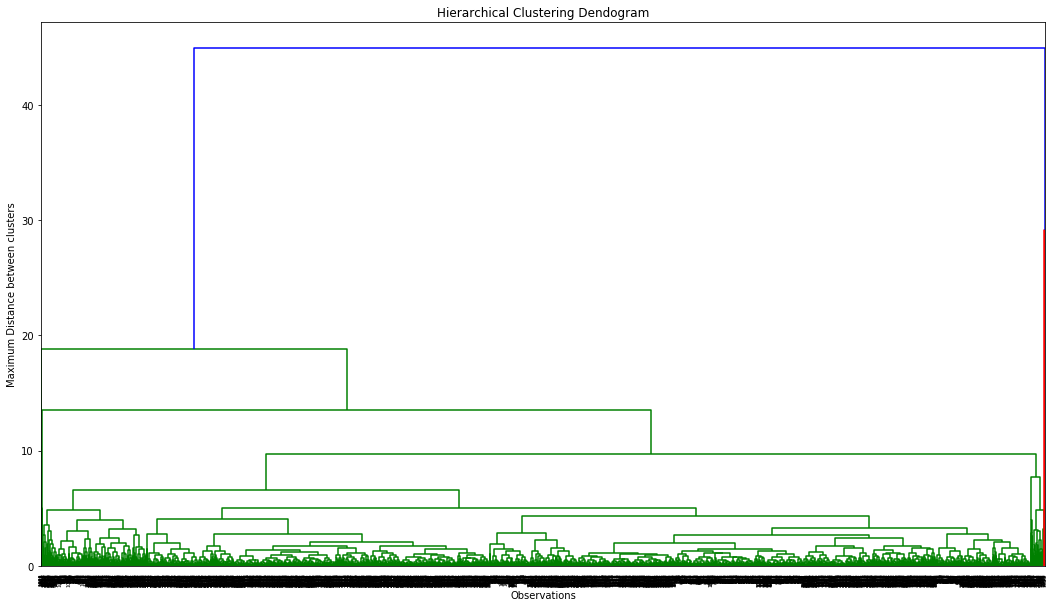

In [ ]:
# Importing the hierarchical clustering module from the scipy.cluster library
from scipy.cluster import hierarchy

# Creating a copy of our preprocessed dataset
X_hc=X.copy()

# Creating a complete link hierarchical clustering model using euclidean distance as our metric
mergings = hierarchy.linkage(X_hc, method="complete", metric='euclidean')

# Plotting the dendogram of our cluster
plt.subplots(figsize=(18, 10))
hierarchy.dendrogram(mergings)
plt.xlabel('Observations')
plt.ylabel('Maximum Distance between clusters')
plt.title('Hierarchical Clustering Dendogram')
plt.show()